In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df_test = pd.read_csv('../data/clean/test_group_clean.csv')
df_test['date_time'] = pd.to_datetime(df_test['date_time'], format="ISO8601")

In [3]:
df_test.head()

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,test
1,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,test
2,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,test
3,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,test
4,555,402506806_56087378777,637149525_38041617439_716659,validate,2017-04-15 13:00:34,test


In [4]:
df_control = pd.read_csv('../data/clean/control_group_clean.csv')
df_control['date_time'] = pd.to_datetime(df_control['date_time'], format="ISO8601")

In [5]:
df_control.head()

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,1028,42237450_62128060588,557292053_87239438319_391157,start,2017-04-08 18:51:28,control
1,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,control
2,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:53:20,control
3,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:59:55,control
4,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 19:00:15,control


In [6]:
df_final_demo = pd.read_csv('../data/clean/final_demo_clean.csv')

In [7]:
df_final_demo.head()

,client_id,tenure_mth,age,gender,num_accounts,bal,calls_6_mth,logons_6_mth
0,836976,73,60,U,2,45105.30,6,9
1,2304905,94,58,U,2,110860.30,6,9
2,1439522,64,32,U,2,52467.79,6,9
3,1562045,198,49,M,2,67454.65,3,6
4,5126305,145,33,F,2,103671.75,0,3


In [8]:
client_group = df_test.groupby(by='client_id')

In [9]:
df_test[df_test['client_id'] == 555]

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,test
1,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,test
2,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,test
3,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,test
4,555,402506806_56087378777,637149525_38041617439_716659,validate,2017-04-15 13:00:34,test


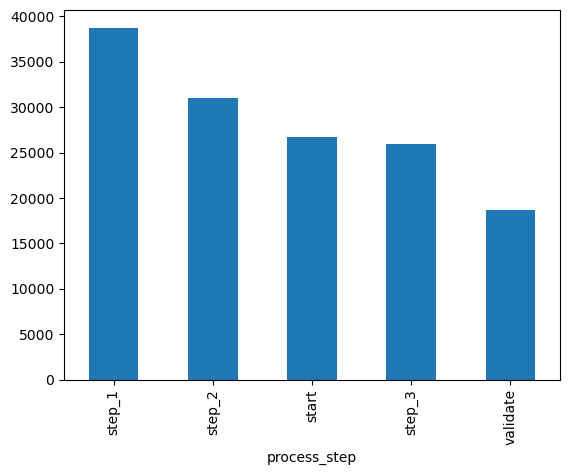

In [10]:
df_test['process_step'].value_counts().plot(kind='bar');

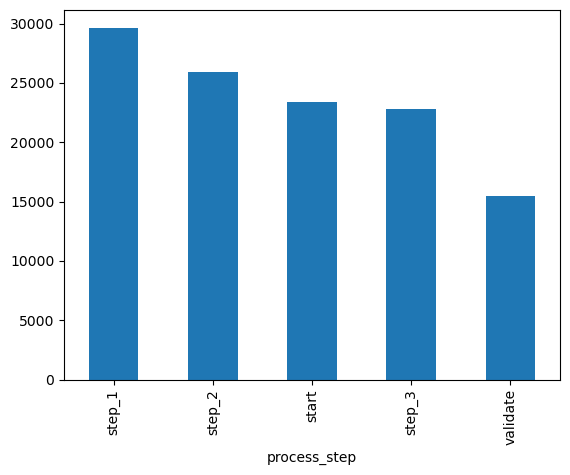

In [11]:
df_control['process_step'].value_counts().plot(kind='bar');

In [12]:
completion_rate_test = round((df_test['process_step'].value_counts()['validate'] / df_test['visit_id'].nunique())*100,2)
print('Completion rate of test group : ', completion_rate_test, '%')

Completion rate of test group :  55.7 %


In [13]:
completion_rate_control =  round((df_control['process_step'].value_counts()['validate'] / df_control['visit_id'].nunique())*100,2)
print('Completion rate of control group : ', completion_rate_control, '%')

Completion rate of control group :  53.21 %


In [14]:
df_test.shape

(141017, 6)

In [15]:
df_control.shape

(117180, 6)

In [16]:
df_final_demo.shape

(50500, 8)

In [18]:
df_test.iloc[1, 'date_time'] - df_test.iloc[0, 'date_time']

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [17]:
#Cellule dangereuse, à ne pas run n'importe comment !
for i in range(1, df_test.shape[0]):
    if df_test.iloc[i-1, 'visit_id'] == df_test.iloc[i, 'visit_id']:
        df_test.iloc[i, 'time_delta'] = df_test.iloc[i, 'date_time'] - df_test.iloc[i-1, 'date_time']
    else:
        df_test.iloc[i, 'time_delta'] = 0

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types